<div style="text-align: center;">
<h1 style="font-weight: bold; margin: 20px 0;">
LPS Training - Advanced Level: Uncertainties in Essential Climate Variables (ECVs): A Focus on Clouds
</h1>
</div>

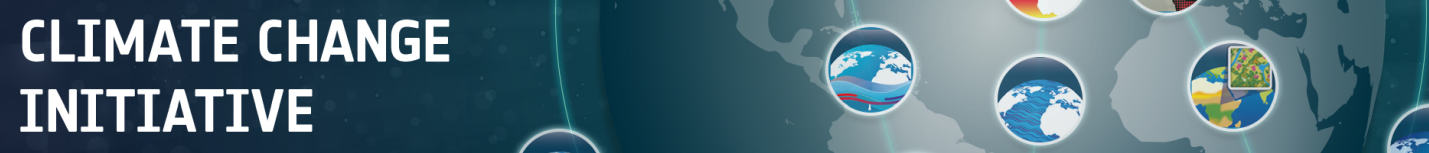

In [1]:
from IPython.display import Image, display
display(Image(filename='CCI_logo.PNG'))

<div style="background-color: #e6f3ff;  padding: 10px; border-left: 5px solid #e6f3ff;">
<h2 style="margin: 0 0 15px 0; font-size: 1.4em;">Introduction:</h2>

In climate science, no measurement is perfect—and understanding the uncertainties in our data is crucial for interpreting trends and making robust conclusions. This notebook explores the uncertainties associated with Essential Climate Variables (ECVs), using cloud properties as a representative example.

The ESA Climate Change Initiative (CCI) provides not only long-term datasets of key climate parameters, but also associated per-pixel uncertainty layers that quantify the confidence in each data point. These uncertainty values reflect the effects of sensor noise, retrieval limitations, and algorithm assumptions, all of which are especially relevant in satellite-derived variables like cloud cover.

**Using the ESA CCI Toolbox, we will:**

* Load both the primary cloud dataset (e.g. total cloud fraction and liquid water path) and its associated uncertainty layer
* Visualize spatial patterns of cloud cover and uncertainty and liquid water path and its uncertainty
* Discuss what these uncertainty values represent and how to interpret them when analyzing climate signals


**By the end of this section, you'll gain a better understanding of:**

* Why uncertainty information is critical for satellite climate datasets
* How the CCI represents and provides uncertainty
* How to visualize and work with these values in your own analyses
<div>

### 1. Import Necessary Packages

In this section, we import the required Python packages to work with ESA Climate Change Initiative (CCI) data. Most notably, we use the [ESA Climate Toolbox](https://esa-climate-toolbox.readthedocs.io/en/latest/) which simplifies access, manipulation, and visualization of CCI datasets in Python.

These packages allow us to:
- Access satellite-based climate data records from ESA.
- Handle geospatial and temporal dimensions efficiently.
- Visualize data with intuitive plotting tools.

📚 For a broader introduction to the toolbox and how to install it, visit:  
🔗 [ESA CCI Climate Toolbox Quick Start](https://esa-climate-toolbox.readthedocs.io/en/latest/quick_start.html#jupyter-notebooks)  
🔗 [ESA Climate Data Toolbox Website](https://climate.esa.int/en/data/toolbox/)

In [2]:
# Create a new data store (e.g., remote or local access point for datasets)
from xcube.core.store import new_data_store

# Core functions from the ESA Climate Toolbox to access and process ECV datasets
from esa_climate_toolbox.core import get_op               # Get predefined operations (e.g., time series mean, subsetting)
from esa_climate_toolbox.core import list_ecv_datasets    # List available Essential Climate Variable (ECV) datasets
from esa_climate_toolbox.core import get_store            # Connect to a specific data store (e.g., ESA CCI)
from esa_climate_toolbox.core import list_datasets        # List all datasets within the selected store

# Plotting utility for ESA CCI toolbox outputs
from esa_climate_toolbox.ops import plot                  # Quick plotting for processed data

# Work with labeled multi-dimensional arrays (ideal for satellite/climate data)
import xarray as xr

# Plotting library for static figures
import matplotlib.pyplot as plt
# Ensure that plots appear inline in Jupyter notebooks
%matplotlib inline  

# Suppress warning messages (optional, for cleaner notebook output)
import warnings

# Numerical operations and array manipulation
import numpy as np

# Interactive plotting with Plotly
import plotly.io as pio
pio.renderers.default = 'notebook_connected'  # Ensures Plotly figures render properly in notebooks

import plotly.graph_objects as go  # Create detailed and interactive figures with full layout control

### Step 2: Connect to the ESA CCI Data Store

The ESA Climate Toolbox provides direct access to the **ESA Climate Data Store**, which hosts harmonized satellite-based climate data records produced under the **ESA Climate Change Initiative (CCI)**.

In this step, we establish a connection to the data store so we can browse and open datasets. This connection allows us to access data **without having to download files manually** — a convenient way to explore and analyze large geospatial datasets in cloud-friendly formats such as **Zarr** or **Kerchunk**.

The data store includes a wide range of essential climate variables (ECVs), such as aerosols, land surface temperature, sea level, and soil moisture.

📘 Learn more about available datasets:  
🔗 [ESA Climate Data Toolbox – Quick Start Guide](https://esa-climate-toolbox.readthedocs.io/en/latest/quick_start.html#data-access)

In [3]:
cci_store = new_data_store("esa-cci")
# List all available data sets of an ECV
list_ecv_datasets("Cloud")

[('esacci.CLOUD.mon.L3C.CLD_PRODUCTS.MODIS.Aqua.MODIS_AQUA.2-0.r1', 'esa-cci'),
 ('esacci.CLOUD.mon.L3C.CLD_PRODUCTS.MODIS.Terra.MODIS_TERRA.2-0.r1',
  'esa-cci'),
 ('esacci.CLOUD.mon.L3C.CLD_PRODUCTS.multi-sensor.multi-platform.ATSR2-AATSR.3-0.r1',
  'esa-cci'),
 ('esacci.CLOUD.mon.L3C.CLD_PRODUCTS.multi-sensor.multi-platform.AVHRR-AM.3-0.r1',
  'esa-cci'),
 ('esacci.CLOUD.mon.L3C.CLD_PRODUCTS.multi-sensor.multi-platform.AVHRR-PM.3-0.r1',
  'esa-cci'),
 ('esacci.CLOUD.mon.L3C.CLD_PRODUCTS.multi-sensor.multi-platform.MERIS-AATSR.2-0.r1',
  'esa-cci'),
 ('ESACCI-L3C_CLOUD-CLD_PRODUCTS-MODIS_AQUA-200208-201412-fv2.0_kr1.0',
  'esa-cci-kc'),
 ('ESACCI-L3C_CLOUD-CLD_PRODUCTS-ATSR2_AATSR-199506-201204-fv3.0-kr1.1',
  'esa-cci-kc'),
 ('ESACCI-L3C_CLOUD-CLD_PRODUCTS-AVHRR_AM-199109-201612-fv3.0-kr1.1',
  'esa-cci-kc'),
 ('ESACCI-L3C_CLOUD-CLD_PRODUCTS-AVHRR_PM-198201-201612-fv3.0-kr1.1',
  'esa-cci-kc'),
 ('ESACCI-L3C_CLOUD-CLD_PRODUCTS-MERIS-AATSR_ENVISAT-200301-201112_fv2.0_kr1.0',
  'esa-c

### Step 3: Define the Dataset ID  
To work with a specific ESA CCI dataset, we need to specify its **dataset ID**. This unique identifier tells the toolbox which variable and product we want to access.

In this example, we are using a dataset from the **Cloud CCI project** that provides monthly Level 3 cloud property products, derived from multiple satellite sensors. These products include key cloud variables such as **cloud fraction (cfc)** and **liquid water path (lwp)** including their uncertainties.

We will use the following dataset ID:

In [4]:
data_id = 'esacci.CLOUD.mon.L3C.CLD_PRODUCTS.multi-sensor.multi-platform.AVHRR-PM.3-0.r1'
cci_store.describe_data(data_id)

You can find more information on the dataset on the CEDA website [(Link)](https://catalogue.ceda.ac.uk/uuid/004fd44ff5124174ad3c03dd2c67d548/).
If you click on "Related Documents", you can find the documents about the algorithm description (ATBD CC4CL and ATBD). Those documents include the information on how the uncertainties are calculated and which parameters are included in the dataset.


### Step 4: Define Time Range and Variables of Interest and Open the Dataset

Before opening the dataset, we define a few key parameters. We focus on only one day to decrease the dataload. If you wish to look at the time series of the uncertainties, you can change the start and end date to the desired time range. 

- **Time range**: the date(s) we want to load
- **Variables**: which data variable(s) to retrieve
- *(Optional)* **Bounding box**: spatial region of interest — here we skip it to load the global dataset

In [5]:
variables = ['cfc','cfc_unc','lwp','lwp_unc','lwp_prop_unc','lwp_corr_unc']  # Variables to retrieve, their names can be found through the cci_store.describe_data(data_id) command above
start_date = '1997-12-01'    # Start and end date (same for a single timestep)
end_date = '1997-12-01'

Now we open the dataset using the selected parameters.  
The ESA Climate Toolbox will download only the necessary data (e.g., variable and time range).
You can always adjust the time range or variables to explore different slices of the dataset.

In [6]:
cloud_ds = cci_store.open_data(
    data_id=data_id,
    variable_names=variables,
    time_range=[start_date, end_date]
)
display(cloud_ds)

<xarray.Dataset> Size: 12MB
Dimensions:                       (time: 1, lat: 360, lon: 720,
                                   hist1d_cer_bin_border: 12,
                                   hist1d_cer_bin_centre: 11,
                                   hist1d_cla_vis006_bin_border: 14,
                                   hist1d_cla_vis006_bin_centre: 13,
                                   hist1d_cla_vis008_bin_border: 14,
                                   ...
                                   hist1d_cwp_bin_centre: 14,
                                   hist2d_cot_bin_border: 14,
                                   hist2d_cot_bin_centre: 13,
                                   hist2d_ctp_bin_border: 16,
                                   hist2d_ctp_bin_centre: 15, hist_phase: 2,
                                   bnds: 2)
Coordinates: (12/23)
  * hist1d_cer_bin_border         (hist1d_cer_bin_border) float32 48B 0.0 ......
  * hist1d_cer_bin_centre         (hist1d_cer_bin_centre) float32 44B 1.5 ......
  * hist1d_cla_vis006_bin_border  (hist1d_cla_vis006_bin_border) float32 56B ...
  * hist1d_cla_vis006_bin_centre  (hist1d_cla_vis006_bin_centre) float32 52B ...
  * hist1d_cla_vis008_bin_border  (hist1d_cla_vis008_bin_border) float32 56B ...
  * hist1d_cla_vis008_bin_centre  (hist1d_cla_vis008_bin_centre) float32 52B ...
    ...                            ...
  * hist2d_ctp_bin_centre         (hist2d_ctp_bin_centre) float32 60B 45.5 .....
  * hist_phase                    (hist_phase) int8 2B 0 1
  * lat                           (lat) float32 1kB -89.75 -89.25 ... 89.75
  * lon                           (lon) float32 3kB -179.8 -179.2 ... 179.8
  * time                          (time) datetime64[ns] 8B 1997-12-16T12:00:00
    time_bnds                     (time, bnds) datetime64[ns] 16B dask.array<chunksize=(1, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    cfc                           (time, lat, lon) float64 2MB dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    cfc_unc                       (time, lat, lon) float64 2MB dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    lwp                           (time, lat, lon) float64 2MB dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    lwp_corr_unc                  (time, lat, lon) float64 2MB dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    lwp_prop_unc                  (time, lat, lon) float64 2MB dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    lwp_unc                       (time, lat, lon) float64 2MB dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.CLOUD.mon.L3C.CLD_PRODUCTS.multi-sensor.m...
    date_created:            2025-06-18T13:35:53.010899
    processing_level:        L3C
    time_coverage_start:     1997-12-01T00:00:00
    time_coverage_end:       1998-01-01T00:00:00
    time_coverage_duration:  P31DT0H0M0S
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...

### Step 5: Extract the Variables and create a 3D Plot 
#### Cloud Fraction (CFC)
Next, we extract the variables we would like to plot. We start with the cloud fraction (CFC) and its uncertainty. 


In [7]:
# Extract variables
cfc = cloud_ds['cfc'].squeeze()
cfc_unc = cloud_ds['cfc_unc'].squeeze()

# Get coordinate arrays - the lat and lon are the same for cfc_unc and cfc, thus we only load them here via the cfc variable
lon = cfc['lon'].values
lat = cfc['lat'].values

# Get 2D grids (assuming dims are [lat, lon])
z_unc = cfc_unc.values  # Uncertainty for Z-axis
surface_color = cfc.values  # For coloring the surface

Now we use the `plotly` package to create an interactive plot of the uncertainty. We use the CFC as color and the uncertainty will be shown on the vertical axis.

In [8]:
# Create 2D coordinate grids
lon2d, lat2d = np.meshgrid(lon, lat)

# Check that all arrays have the same shape
assert lon2d.shape == lat2d.shape == z_unc.shape == surface_color.shape, "Shape mismatch"

# Create surface plot, define hover variables too show data via mouse hovering
fig = go.Figure(
    data=[go.Surface(
        x=lon2d,
        y=lat2d,
        z=z_unc,
        surfacecolor=surface_color,
        colorscale="Blues_r",
        colorbar=dict(title="Cloud Fraction"),
        hovertemplate=
            "Longitude: %{x}<br>" +
            "Latitude: %{y}<br>" +
            "Uncertainty in %: %{z:.2f}<br>"
    )]
)

fig.update_layout(
    title=dict(text='Cloud Fraction Uncertainty Surface'),
    autosize=False,
    width=700,
    height=600,
    margin=dict(l=65, r=50, b=65, t=90),
    scene=dict(
        xaxis_title="Longitude",
        yaxis_title="Latitude",
        zaxis_title="Uncertainty in %",
        yaxis=dict(range=[90, -90]),  # Reverse latitude axis 
        xaxis=dict(range=[180,-180]) # Reverse longitude axis
    )
)

fig.show()


### What do we see?
The uncertainties in Cloud Fraction Cover (CFC) are relatively straightforward to interpret.
They are based on the average probability of cloud presence for each pixel, where the cloud detection algorithm classifies pixels as either "cloud" (1) or "no cloud" (0).

Uncertainties arise in cases where the classification is ambiguous—for example, over bright surfaces like snow or desert, where high surface albedo makes it difficult to distinguish clouds from the background. In such situations, the cloud detection confidence is reduced, leading to higher uncertainty values. We can see this above Antarctica, for example, where the uncertainty is abruptly rising while above the ocean along the coast of Antarctica and further north, the uncertainties are very low. 

## Liquid Water Path (LWP)
Now we move on to a more complex parameter, the liquid water path (LWP). 

Satellite retrievals of LWP are based on radiative measurements (like reflectance, brightness temperature) which are fed into physical models. These retrievals are subject to various uncertainties, which are separated into two main types:

##### **1. Propagated Uncertainty (`lwp_prop_unc`)**

**Definition:**

- Uncertainties that originate from input measurements and propagate through the retrieval algorithm.
    
- These stem from:
    - Instrumental noise
    - Calibration errors
    - Assumed atmospheric conditions
    - Model assumptions within the retrieval algorithm
 
**How it's computed:**

- Derived by error propagation using **analytic formulas** or **sensitivity analysis**.
- It accounts for how small errors in input variables affect the output (LWP).

**Characteristics:**

- Pixel-specific
- Varies with atmospheric conditions, viewing geometry, surface type

##### **2. Correlated Uncertainty (`lwp_corr_unc`)**
**Definition**

- Uncertainties that are spatially or temporally correlated, not random per pixel.
- These come from:
    - Systematic biases in retrieval algorithms
    - Assumptions in radiative transfer models
    - Shared calibration errors across multiple observations

**Characteristics:**

- Not independent from pixel to pixel
- Important for regional or temporal averaging
- Not properly accounting for this can lead to overconfident estimates

##### **3. Total Uncertainty (`lwp_unc`)**
ESA CCI computes total uncertainty as a quadrature sum of both components:

$\text{lwp\_unc} = \sqrt{(\text{lwp\_prop\_unc})^2 + (\text{lwp\_corr\_unc})^2}$

This assumes the propagated and correlated components are independent.

##### **Why is the combination of uncertainties relevant?**

If you’re analyzing individual pixels, the propagated uncertainty dominates. If you’re computing regional means or trends, you must consider correlated uncertainty — otherwise, your confidence intervals will be too optimistic.


In this publication, you can read a more detailed description: [Stengel et al., Cloud property datasets retrieved from AVHRR, MODIS, AATSR and MERIS in the framework of the Cloud_cci project (2017)](https://doi.org/10.5194/essd-9-881-2017).

In this ESA Cloud CCI Product User Guide, you can find all parameters and uncertainties listed: [ESA Cloud_cci Product User Guide (PUG)](https://climate.esa.int/media/documents/Cloud_Product-User-Guide-PUG_v5.1.pdf).

#### Plotting the Correlated Uncertainty

In [16]:
# Extract and squeeze variables
lwp = cloud_ds['lwp'].squeeze()
lwp_corr_unc = cloud_ds['lwp_corr_unc'].squeeze()

# Get 1D coordinate arrays
lon = lwp['lon'].values
lat = lwp['lat'].values

# Create 2D coordinate grids
lon2d, lat2d = np.meshgrid(lon, lat)

# Get 2D data arrays
z_unc = lwp_corr_unc.values
surface_color = lwp.values

# Check that all arrays have the same shape
assert lon2d.shape == lat2d.shape == z_unc.shape == surface_color.shape, "Shape mismatch"

# Create surface plot
fig = go.Figure(
    data=[go.Surface(
        x=lon2d,
        y=lat2d,
        z=z_unc,
        surfacecolor=surface_color,
        colorscale="viridis",
        colorbar=dict(title="Liquid Water Path (g/m2)"),
        cmin = 0,
        cmax = 500,
        hovertemplate=
            "Longitude: %{x}<br>" +
            "Latitude: %{y}<br>" +
            "Correlated Uncertainty (g/m2): %{z:.2f}<br>"
    )]
)

fig.update_layout(
    title=dict(text='Liquid Water Path Correlated Uncertainty'),
    autosize=False,
    width=700,
    height=600,
    margin=dict(l=65, r=50, b=65, t=90),
    scene=dict(
        xaxis_title="Longitude",
        yaxis_title="Latitude",
        zaxis_title="Correlated Uncertainty (g/m2)",
        yaxis=dict(range=[90, -90]),  # Reverse latitude axis 
        xaxis=dict(range=[180,-180]) # Reverse longitude axis
    )
)

# uncomment the next line "fig.show()" AND comment the "pass" command to show the figure:
#fig.show()
pass

In [15]:
# Extract and squeeze variables
lwp = cloud_ds['lwp'].squeeze()
lwp_prop_unc = cloud_ds['lwp_prop_unc'].squeeze()

# Get 1D coordinate arrays
lon = lwp['lon'].values
lat = lwp['lat'].values

# Create 2D coordinate grids
lon2d, lat2d = np.meshgrid(lon, lat)

# Get 2D data arrays
z_unc = lwp_prop_unc.values
surface_color = lwp.values

# Check that all arrays have the same shape
assert lon2d.shape == lat2d.shape == z_unc.shape == surface_color.shape, "Shape mismatch"

# Create surface plot
fig = go.Figure(
    data=[go.Surface(
        x=lon2d,
        y=lat2d,
        z=z_unc,
        surfacecolor=surface_color,
        colorscale="viridis",
        colorbar=dict(title="Liquid Water Path (g/m2)"),
        cmin = 0,
        cmax = 500,
        hovertemplate=
            "Longitude: %{x}<br>" +
            "Latitude: %{y}<br>" +
            "Propagated Uncertainty (g/m2): %{z:.2f}<br>"
    )]
)

fig.update_layout(
    title=dict(text='Liquid Water Path Propagated Uncertainty'),
    autosize=False,
    width=700,
    height=600,
    margin=dict(l=65, r=50, b=65, t=90),
    scene=dict(
        xaxis_title="Longitude",
        yaxis_title="Latitude",
        zaxis_title="Propagated Uncertainty (g/m2)",
        yaxis=dict(range=[90, -90]),  # Reverse latitude axis 
        xaxis=dict(range=[180,-180]) # Reverse longitude axis
    )
)

# uncomment the next line "fig.show()" AND comment the "pass" command to show the figure:
#fig.show()
pass

#### Plotting the total uncertainty of LWP

In [14]:
# Extract and squeeze variables
lwp = cloud_ds['lwp'].squeeze()
lwp_unc = cloud_ds['lwp_unc'].squeeze()

# Get 1D coordinate arrays
lon = lwp['lon'].values
lat = lwp['lat'].values

# Create 2D coordinate grids
lon2d, lat2d = np.meshgrid(lon, lat)

# Get 2D data arrays
z_unc = lwp_unc.values
surface_color = lwp.values

# Check that all arrays have the same shape
assert lon2d.shape == lat2d.shape == z_unc.shape == surface_color.shape, "Shape mismatch"

# Create surface plot
fig = go.Figure(
    data=[go.Surface(
        x=lon2d,
        y=lat2d,
        z=z_unc,
        surfacecolor=surface_color,
        colorscale="viridis",
        colorbar=dict(title="Liquid Water Path (g/m2)"),
        cmin = 0,
        cmax = 500,
        hovertemplate=
            "Longitude: %{x}<br>" +
            "Latitude: %{y}<br>" +
            "Uncertainty (g/m2): %{z:.2f}<br>"
    )]
)

fig.update_layout(
    title=dict(text='Liquid Water Path Total Uncertainty'),
    autosize=False,
    width=700,
    height=600,
    margin=dict(l=65, r=50, b=65, t=90),
    scene=dict(
        xaxis_title="Longitude",
        yaxis_title="Latitude",
        zaxis_title="Uncertainty (g/m2)",
        yaxis=dict(range=[90, -90]),  # Reverse latitude axis 
        xaxis=dict(range=[180,-180]) # Reverse longitude axis
    )
)

# uncomment the next line "fig.show()" AND comment the "pass" command to show the figure:
#fig.show()
pass

#### What do we see?
The uncertainty increases toward the northern polar region. Since this data is from December, the Sun's zenith angle is low in these latitudes, resulting in limited visible light and higher retrieval uncertainty. Therefore, the high LWP values observed in the northern hemisphere should be interpreted with caution, as they are associated with high uncertainty.